## Exporting Edmonton Weather Data
### Luke Barry


This project scrapes data from the [Open Weather]('https://openweathermap.org/current') websit to gather information on the weather from Edmonton, Alberta, Canada (my home city), transforms that data into a pandas dataframe, visualizes the data, and exports it to excel.

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import xml.etree.ElementTree as ET
import csv
from datetime import datetime
#API = ###########################

##### Getting the Data for Edmonton, Canada

In [2]:
#f = Forecast
f = requests.get('https://api.openweathermap.org/data/2.5/forecast?q=Edmonton&mode=xml&units=metric&&appid=#####################')
f_text = f.text

#cw = Current Weather
url = 'https://api.openweathermap.org/data/2.5/weather?q=Edmonton&mode=xml&units=metric&appid=##########################'
cw = requests.get(url)
cw_text = cw.text

In [3]:
%%html
<a href="https://openweathermap.org/city/5946768">Edmonton Weather Data</a> |
<a href="https://openweathermap.org/current">Current Weather API</a> |
<a href="https://openweathermap.org/forecast5">Forecast API</a>

##### Making beautiful soup.
I made the file xml because the info from the site defaulted as json and only offered xml as an alternative format, which I found easier too read.

In [4]:
f_soup = BeautifulSoup(f_text, "lxml-xml")
cw_soup = BeautifulSoup(cw_text, "lxml-xml")

#### 5 day Forecast Edmonton

In [5]:
print(f_soup.prettify())

<?xml version="1.0" encoding="utf-8"?>
<weatherdata>
 <location>
  <name>
   Edmonton
  </name>
  <type/>
  <country>
   CA
  </country>
  <timezone>
   -25200
  </timezone>
  <location altitude="0" geobase="geonames" geobaseid="5946768" latitude="53.5501" longitude="-113.4687"/>
 </location>
 <credit/>
 <meta>
  <lastupdate/>
  <calctime>
   0
  </calctime>
  <nextupdate/>
 </meta>
 <sun rise="2021-01-19T15:37:23" set="2021-01-19T23:51:41"/>
 <forecast>
  <time from="2021-01-19T18:00:00" to="2021-01-19T21:00:00">
   <symbol name="overcast clouds" number="804" var="04d"/>
   <precipitation probability="0"/>
   <windDirection code="WSW" deg="238" name="West-southwest"/>
   <windSpeed mps="5.5" name="Moderate breeze" unit="m/s"/>
   <temperature max="2.47" min="0.98" unit="celsius" value="0.98"/>
   <feels_like unit="celsius" value="-5.42"/>
   <pressure unit="hPa" value="1006"/>
   <humidity unit="%" value="67"/>
   <clouds all="95" unit="%" value="overcast clouds"/>
   <visibility valu

##### Extracting the desired data with Element Tree.

In [6]:
f_tree = ET.fromstring(f.text)

times = []
temps = []
feels_like = []
clouds = []
wind = []
humidity = []

for elem in f_tree.iter():
    if elem.tag == 'time':
        times.append(datetime.strptime(elem.get('from'), '%Y-%m-%dT%H:%M:%S'))

    if elem.tag == 'temperature':
        temps.append(elem.get('value'))
    
    if elem.tag == 'feels_like':
        feels_like.append(elem.get('value'))

    if elem.tag == 'symbol':
        clouds.append(elem.get('name'))
        
    if elem.tag == 'windSpeed':
        wind.append(elem.get('name'))
        
    if elem.tag == 'humidity':
        humidity.append(elem.get('value'))
        
        
print(times)
print(len(times))
print(temps)
print(len(temps))
print(feels_like)
print(len(feels_like))
print(clouds)
print(len(clouds))
print(wind)
print(len(wind))
print(humidity)
print(len(humidity))

[datetime.datetime(2021, 1, 19, 18, 0), datetime.datetime(2021, 1, 19, 21, 0), datetime.datetime(2021, 1, 20, 0, 0), datetime.datetime(2021, 1, 20, 3, 0), datetime.datetime(2021, 1, 20, 6, 0), datetime.datetime(2021, 1, 20, 9, 0), datetime.datetime(2021, 1, 20, 12, 0), datetime.datetime(2021, 1, 20, 15, 0), datetime.datetime(2021, 1, 20, 18, 0), datetime.datetime(2021, 1, 20, 21, 0), datetime.datetime(2021, 1, 21, 0, 0), datetime.datetime(2021, 1, 21, 3, 0), datetime.datetime(2021, 1, 21, 6, 0), datetime.datetime(2021, 1, 21, 9, 0), datetime.datetime(2021, 1, 21, 12, 0), datetime.datetime(2021, 1, 21, 15, 0), datetime.datetime(2021, 1, 21, 18, 0), datetime.datetime(2021, 1, 21, 21, 0), datetime.datetime(2021, 1, 22, 0, 0), datetime.datetime(2021, 1, 22, 3, 0), datetime.datetime(2021, 1, 22, 6, 0), datetime.datetime(2021, 1, 22, 9, 0), datetime.datetime(2021, 1, 22, 12, 0), datetime.datetime(2021, 1, 22, 15, 0), datetime.datetime(2021, 1, 22, 18, 0), datetime.datetime(2021, 1, 22, 21, 0

In [7]:
city = f_soup.location('name')[0].text
country = f_soup.location('country')[0].text

##### Creating another list to include the day of the week into the dataframe.

In [8]:
weekday = []
for i in times:
    y = i.strftime('%a')
    weekday.append(y)

##### Creating prandas dataframe & exporting to csv

In [9]:
d = {'Times':times,'Temps':temps, 'Feels like':feels_like, 'Day':weekday, 'Clouds':clouds, 'Wind':wind, 'Humidity':humidity}
df = pd.DataFrame(d, columns=['Day', 'Times', 'Temps', 'Feels like', 'Clouds', 'Wind', 'Humidity'])
df.head()

,Day,Times,Temps,Feels like,Clouds,Wind,Humidity
0,Tue,2021-01-19 18:00:00,0.98,-5.42,overcast clouds,Moderate breeze,67
1,Tue,2021-01-19 21:00:00,2.07,-3.83,overcast clouds,Gentle Breeze,74
2,Wed,2021-01-20 00:00:00,1.68,-4.57,broken clouds,Moderate breeze,81
3,Wed,2021-01-20 03:00:00,-1.2,-9.09,light snow,Moderate breeze,89
4,Wed,2021-01-20 06:00:00,-2.17,-10.59,clear sky,Fresh Breeze,89


In [10]:
df.to_csv('forecast_edmonton.csv', index=False, encoding='utf-8')

##### Plotting for fun

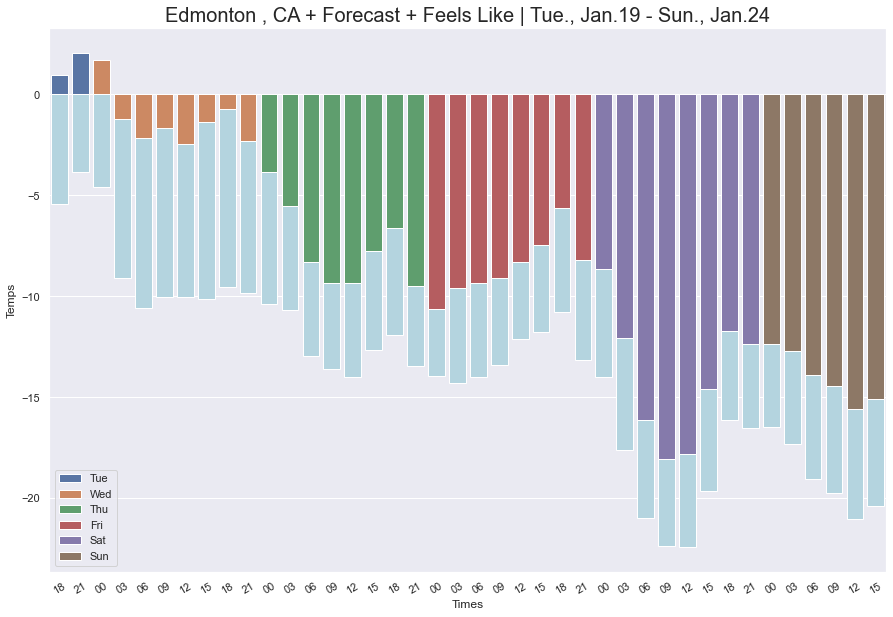

*not missing Canadian winters too much*


In [17]:
import seaborn as sns

date = []
for i in times:
    y = i.strftime('%b.%d')
    date.append(y)
    
sns.set(rc={'figure.figsize':(15, 10)})
a = sns.barplot(x="Times", y="Feels like", color="lightblue", data=df, dodge=False)
ax = sns.barplot(x="Times", y="Temps", hue="Day", data=df, dodge=False)
x_dates = df['Times'].dt.strftime('%H')
ax.set_xticklabels(labels=x_dates, rotation=30)
ax.set_title(city + ' , ' + country + ' + ' + 'Forecast + Feels Like' +' | ' + weekday[0] + '., ' + date[0] + ' - ' + weekday[-1] + '., ' + date[-1], fontsize=20)
a.legend()
plt.show()
print('*not missing Canadian winters too much*')

#### Current Weather

##### Soup

In [12]:
print(cw_soup.prettify())

<?xml version="1.0" encoding="utf-8"?>
<current>
 <city id="5946768" name="Edmonton">
  <coord lat="53.5501" lon="-113.4687"/>
  <country>
   CA
  </country>
  <timezone>
   -25200
  </timezone>
  <sun rise="2021-01-19T15:37:23" set="2021-01-19T23:51:41"/>
 </city>
 <temperature max="0.56" min="-1.67" unit="celsius" value="-0.44"/>
 <feels_like unit="celsius" value="-6.25"/>
 <humidity unit="%" value="55"/>
 <pressure unit="hPa" value="1009"/>
 <wind>
  <speed name="Gentle Breeze" unit="m/s" value="4.12"/>
  <gusts/>
  <direction code="SW" name="Southwest" value="220"/>
 </wind>
 <clouds name="overcast clouds" value="91"/>
 <visibility value="10000"/>
 <precipitation mode="no"/>
 <weather icon="04d" number="804" value="overcast clouds"/>
 <lastupdate value="2021-01-19T18:23:03"/>
</current>


##### Extracting data with beautiful soup

In [13]:
city = cw_soup.findAll("city")[0]["name"]
country = cw_soup.findAll("country")[0].text
temperature = float(cw_soup.findAll("temperature")[0]["value"])
clouds = cw_soup.findAll("clouds")[0]["name"]
wind = cw_soup.findAll("speed")[0]["name"].lower()
print('The current weather in', city, ',', country, 'is',temperature,'°C with', clouds + ' and a ' + wind + '.')

The current weather in Edmonton , CA is -0.44 °C with overcast clouds and a gentle breeze.


##### Dataframe/csv

In [14]:
d2 = {'City':city,'Country':country, 'Temp':temperature, 'Cloudiness':clouds, 'Wind':wind}
df2 = pd.DataFrame(d2, columns=['City', 'Country', 'Temp', 'Cloudiness', 'Wind'], index=[0])
df2.head()

,City,Country,Temp,Cloudiness,Wind
0,Edmonton,CA,-0.44,overcast clouds,gentle breeze


In [15]:
df2.to_csv('current_weather_edmonton.csv', index=False, encoding='utf-8')